### Milestone 2: Descriptive Stats

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|amount_tsh | Total static head (amount water available to waterpoint)	|
|date_recorded |The date the row was entered	|
|funder |Who funded the well	|
|gps_height |Altitude of the well	|
|installer |Organization that installed the well	|
|longitude |GPS coordinate	|
|latitude |GPS coordinate	|
|wpt_name |Name of the waterpoint if there is one	|
|num_private |	|
|basin |Geographic water basin	|
|subvillage |Geographic location	|
|region |Geographic location	|
|region_code | Geographic location (coded)	|
|district_code |Geographic location (coded)	|
|lga |Geographic location	|
|ward |Geographic location	|
|population |Population around the well	|
|public_meeting |True/False	|
|recorded_by |Group entering this row of data	|
|scheme_management |Who operates the waterpoint	|
|scheme_name |Who operates the waterpoint	|
|permit | If the waterpoint is permitted	|
|construction_year |Year the waterpoint was constructed	|
|extraction_type |The kind of extraction the waterpoint uses	|
|extraction_type_group |The kind of extraction the waterpoint uses	|
|extraction_type_class |The kind of extraction the waterpoint uses	|
|management |How the waterpoint is managed	|
|management_group |How the waterpoint is managed	|
|payment |What the water costs	|
|payment_type |What the water costs	|
|water_quality |The quality of the water	|
|quality_group |The quality of the water	|
|quantity |The quantity of water	|
|quantity_group |The quantity of water	|
|source |The source of the water	|
|source_type |The source of the water	|
|source_class |The source of the water	|
|waterpoint_type |The kind of waterpoint	|
|waterpoint_type_group |The kind of waterpoint	|
|functional |the waterpoint is operational and there are no repairs needed	|
|non functional | the waterpoint is not operational |

### Using the space provided, please address the following items:

**Provide a summary of the different descriptive statistics you looked at and WHY.**

**Amount to Total Static Head** is defined as measurement of the total vertical distance that a pump raises water. It tells us how much the pump is taking the water or water levels

**Population** gives us an idea how much pumps are providing water to the surrounding people and places. Are they critical in determining the consistency of pump functioning?

**Construction Year** will provide us the age of the pumps to enable us to tell if the pumps are working or not as they age.

**Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?**

1. Functional pumps gives higher TSH amount as expected
2. Population has no direct influence on pumps
3. The older the pump is, more breakdowns occurs

**Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?**

1. Basin area does tell us which area has more non functional pumps
2. Management does tell us how competent are they in maintaining the pumps
3. Spring sources and communal pipe are the most common.

We will need to drill down more in detail like villages, districts to see any consistencies.

What additional questions are you seeking to answer?

We will need to look at correlation between the features and also examine if feature engineering can be done to extract patterns from the dataset.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("train.csv",parse_dates=['date_recorded'])

In [3]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-06-03,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-03-05,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-07-05,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-11-04,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-08-03,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [5]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [7]:
df2 = df[['amount_tsh','basin', 'subvillage', 'region', 'region_code', 'district_code','population',
         'scheme_management', 'scheme_name','management', 'management_group','construction_year',
         'source', 'source_type', 'source_class', 'waterpoint_type','waterpoint_type_group', 'status_group']]

In [8]:
df2

,amount_tsh,basin,subvillage,region,region_code,district_code,population,scheme_management,scheme_name,management,management_group,construction_year,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,Lake Nyasa,Mnyusi B,Iringa,11,5,109,VWC,Roman,vwc,user-group,1999,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,Lake Victoria,Nyamara,Mara,20,2,280,Other,NaN,wug,user-group,2010,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,Pangani,Majengo,Manyara,21,4,250,VWC,Nyumba ya mungu pipe scheme,vwc,user-group,2009,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,58,VWC,NaN,vwc,user-group,1986,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,Lake Victoria,Kyanyamisa,Kagera,18,1,0,NaN,NaN,other,other,0,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,Pangani,Kiduruni,Kilimanjaro,3,5,125,Water Board,Losaa Kia water supply,water board,user-group,1999,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,4700.0,Rufiji,Igumbilo,Iringa,11,4,56,VWC,Ikondo electrical water sch,vwc,user-group,1996,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,0.0,Rufiji,Madungulu,Mbeya,12,7,0,VWC,NaN,vwc,user-group,0,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,0.0,Rufiji,Mwinyi,Dodoma,1,4,0,VWC,NaN,vwc,user-group,0,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [9]:
df2.isnull().sum()

amount_tsh                   0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
population                   0
scheme_management         3877
scheme_name              28166
management                   0
management_group             0
construction_year            0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        1
status_group                 1
dtype: int64

In [10]:
df2.dropna(inplace=True)

In [11]:
df2.isnull().sum()

amount_tsh               0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
population               0
scheme_management        0
scheme_name              0
management               0
management_group         0
construction_year        0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [12]:
df2["construction_year"].value_counts()

0       7042
2008    1732
2009    1496
2010    1328
2000    1169
2007     941
2006     939
1978     936
2003     867
2002     806
2011     722
1999     691
1972     663
2012     629
2004     587
2005     567
1982     547
1995     543
1998     524
1984     517
1974     512
1985     506
1980     461
1992     460
1990     455
1994     366
2001     347
1970     344
1975     340
1988     321
1993     290
1976     287
1983     279
1996     268
1986     215
1997     201
1987     165
1973     161
1989     159
1977     151
2013     131
1979     125
1981     122
1971     116
1991     109
1960      89
1963      82
1967      72
1968      52
1969      50
1962      28
1964      17
1961      16
1965      14
1966       7
Name: construction_year, dtype: int64

In [13]:
df2["construction_year"] = df2["construction_year"].replace(to_replace=0, value=np.nan)

In [14]:
df2["construction_year"].value_counts()

2008.0    1732
2009.0    1496
2010.0    1328
2000.0    1169
2007.0     941
2006.0     939
1978.0     936
2003.0     867
2002.0     806
2011.0     722
1999.0     691
1972.0     663
2012.0     629
2004.0     587
2005.0     567
1982.0     547
1995.0     543
1998.0     524
1984.0     517
1974.0     512
1985.0     506
1980.0     461
1992.0     460
1990.0     455
1994.0     366
2001.0     347
1970.0     344
1975.0     340
1988.0     321
1993.0     290
1976.0     287
1983.0     279
1996.0     268
1986.0     215
1997.0     201
1987.0     165
1973.0     161
1989.0     159
1977.0     151
2013.0     131
1979.0     125
1981.0     122
1971.0     116
1991.0     109
1960.0      89
1963.0      82
1967.0      72
1968.0      52
1969.0      50
1962.0      28
1964.0      17
1961.0      16
1965.0      14
1966.0       7
Name: construction_year, dtype: int64

In [15]:
df2['age'] = 2020 - df2["construction_year"]

In [16]:
df2

,amount_tsh,basin,subvillage,region,region_code,district_code,population,scheme_management,scheme_name,management,management_group,construction_year,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age
0,6000.0,Lake Nyasa,Mnyusi B,Iringa,11,5,109,VWC,Roman,vwc,user-group,1999.0,spring,spring,groundwater,communal standpipe,communal standpipe,functional,21.0
2,25.0,Pangani,Majengo,Manyara,21,4,250,VWC,Nyumba ya mungu pipe scheme,vwc,user-group,2009.0,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,11.0
5,20.0,Pangani,Moa/Mwereme,Tanga,4,8,1,VWC,Zingibali,vwc,user-group,2009.0,other,other,unknown,communal standpipe multiple,communal standpipe,functional,11.0
13,0.0,Pangani,Omarini,Kilimanjaro,3,7,1,Water Board,BL Bondeni,water board,user-group,2009.0,spring,spring,groundwater,communal standpipe,communal standpipe,functional,11.0
14,0.0,Internal,Mwabasabi,Shinyanga,17,6,0,WUG,None,wug,user-group,NaN,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59382,6.0,Pangani,Yamu Juu,Kilimanjaro,3,4,1,Water Board,Kirua kahe gravity water supply trust,water board,user-group,2008.0,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,12.0
59387,100.0,Wami / Ruvu,Mtaa Wa Yangeyange,Dar es Salaam,7,2,100,WUA,M,wua,user-group,2000.0,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,20.0
59391,0.0,Pangani,Maore Kati,Kilimanjaro,3,3,210,Water authority,Hingilili,vwc,user-group,1967.0,river,river/lake,surface,communal standpipe,communal standpipe,non functional,53.0
59395,10.0,Pangani,Kiduruni,Kilimanjaro,3,5,125,Water Board,Losaa Kia water supply,water board,user-group,1999.0,spring,spring,groundwater,communal standpipe,communal standpipe,functional,21.0


### Data Visualization

### Univariate Data Exploration

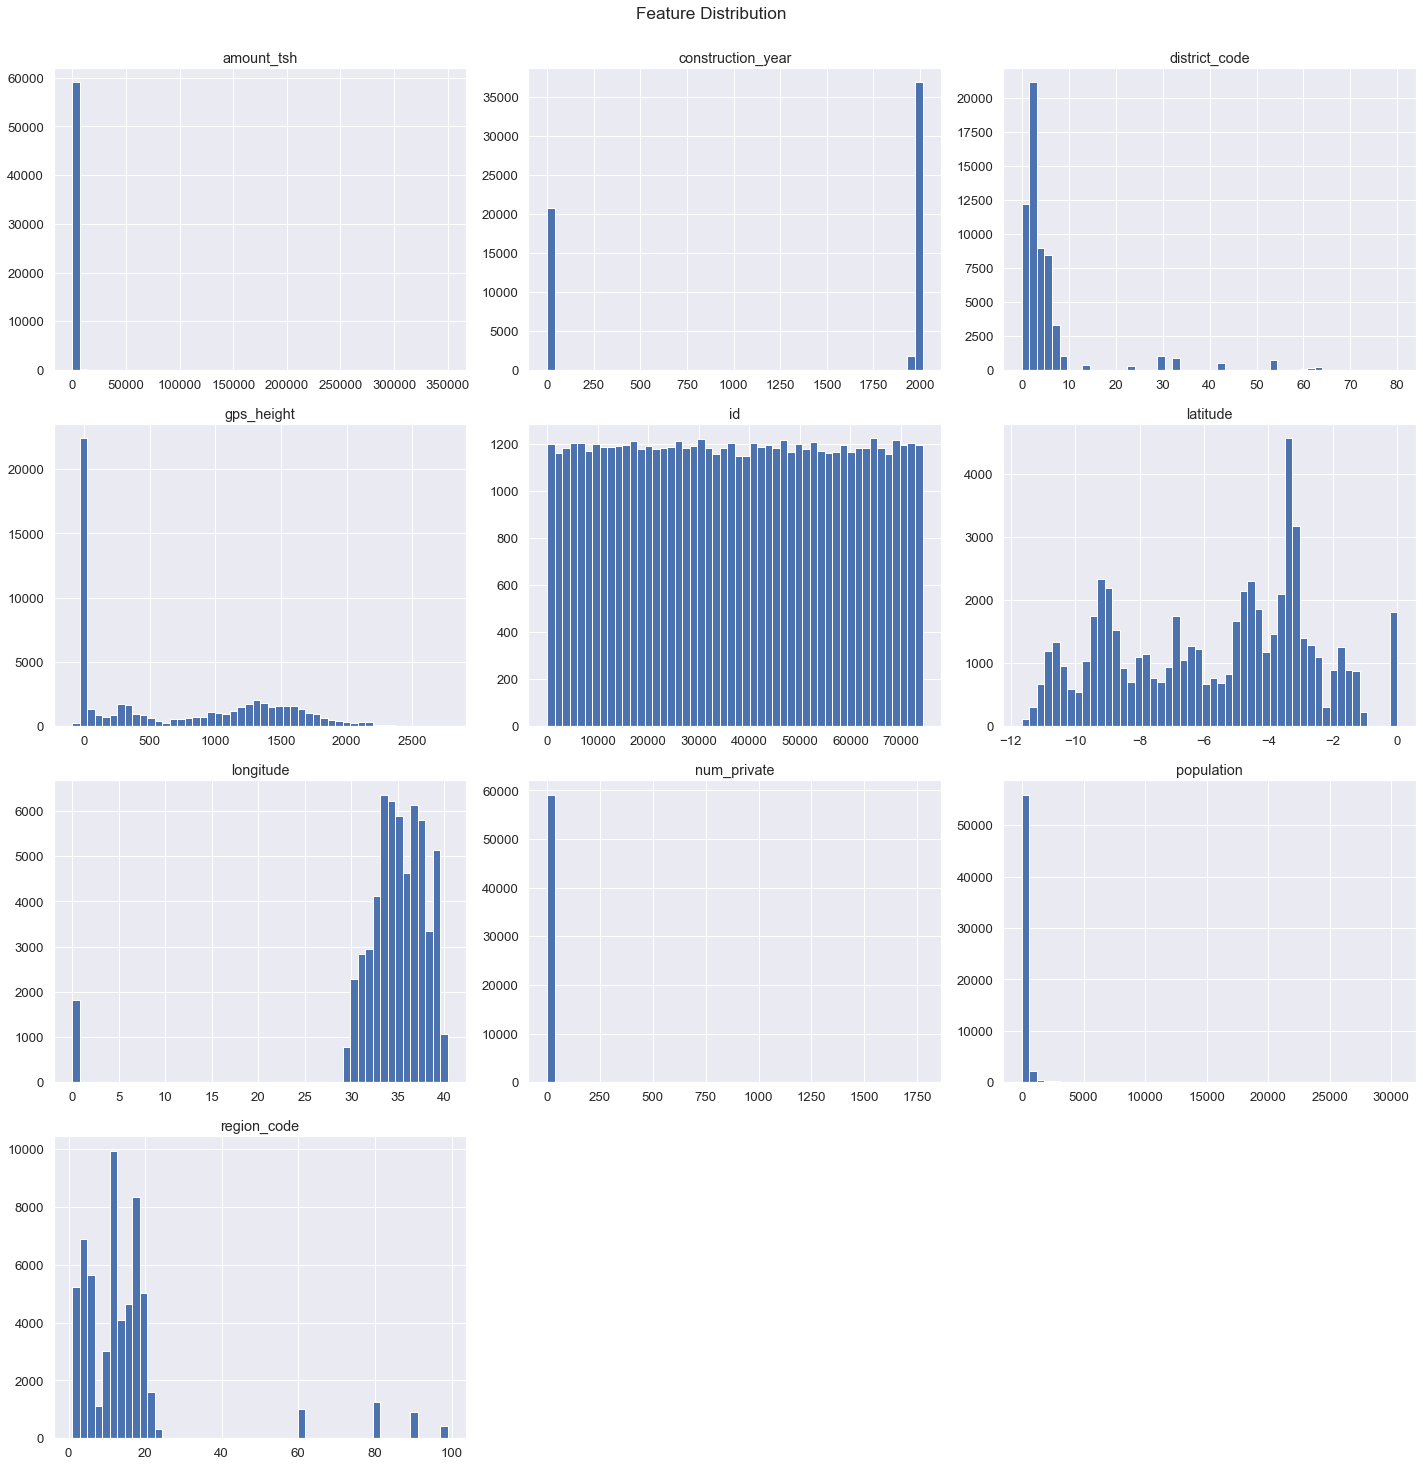

In [17]:
df.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

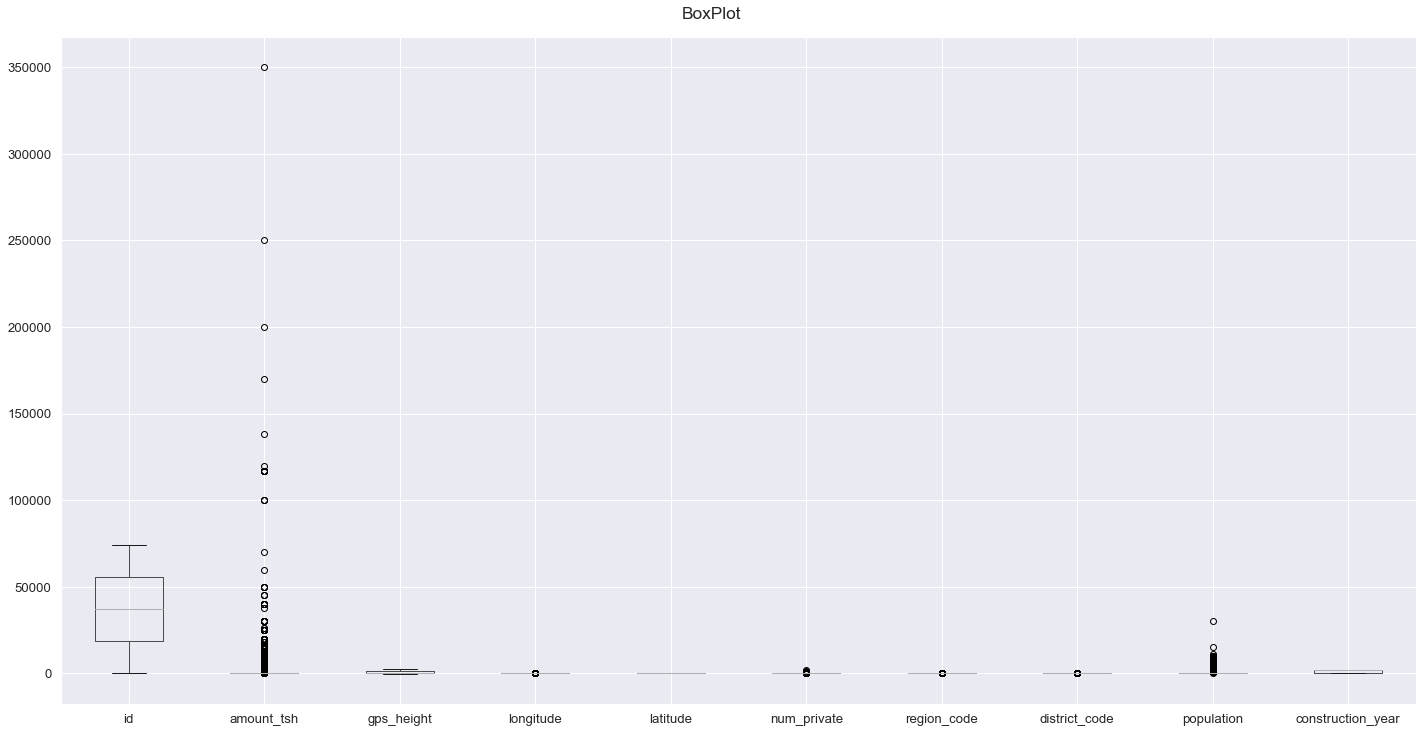

In [18]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

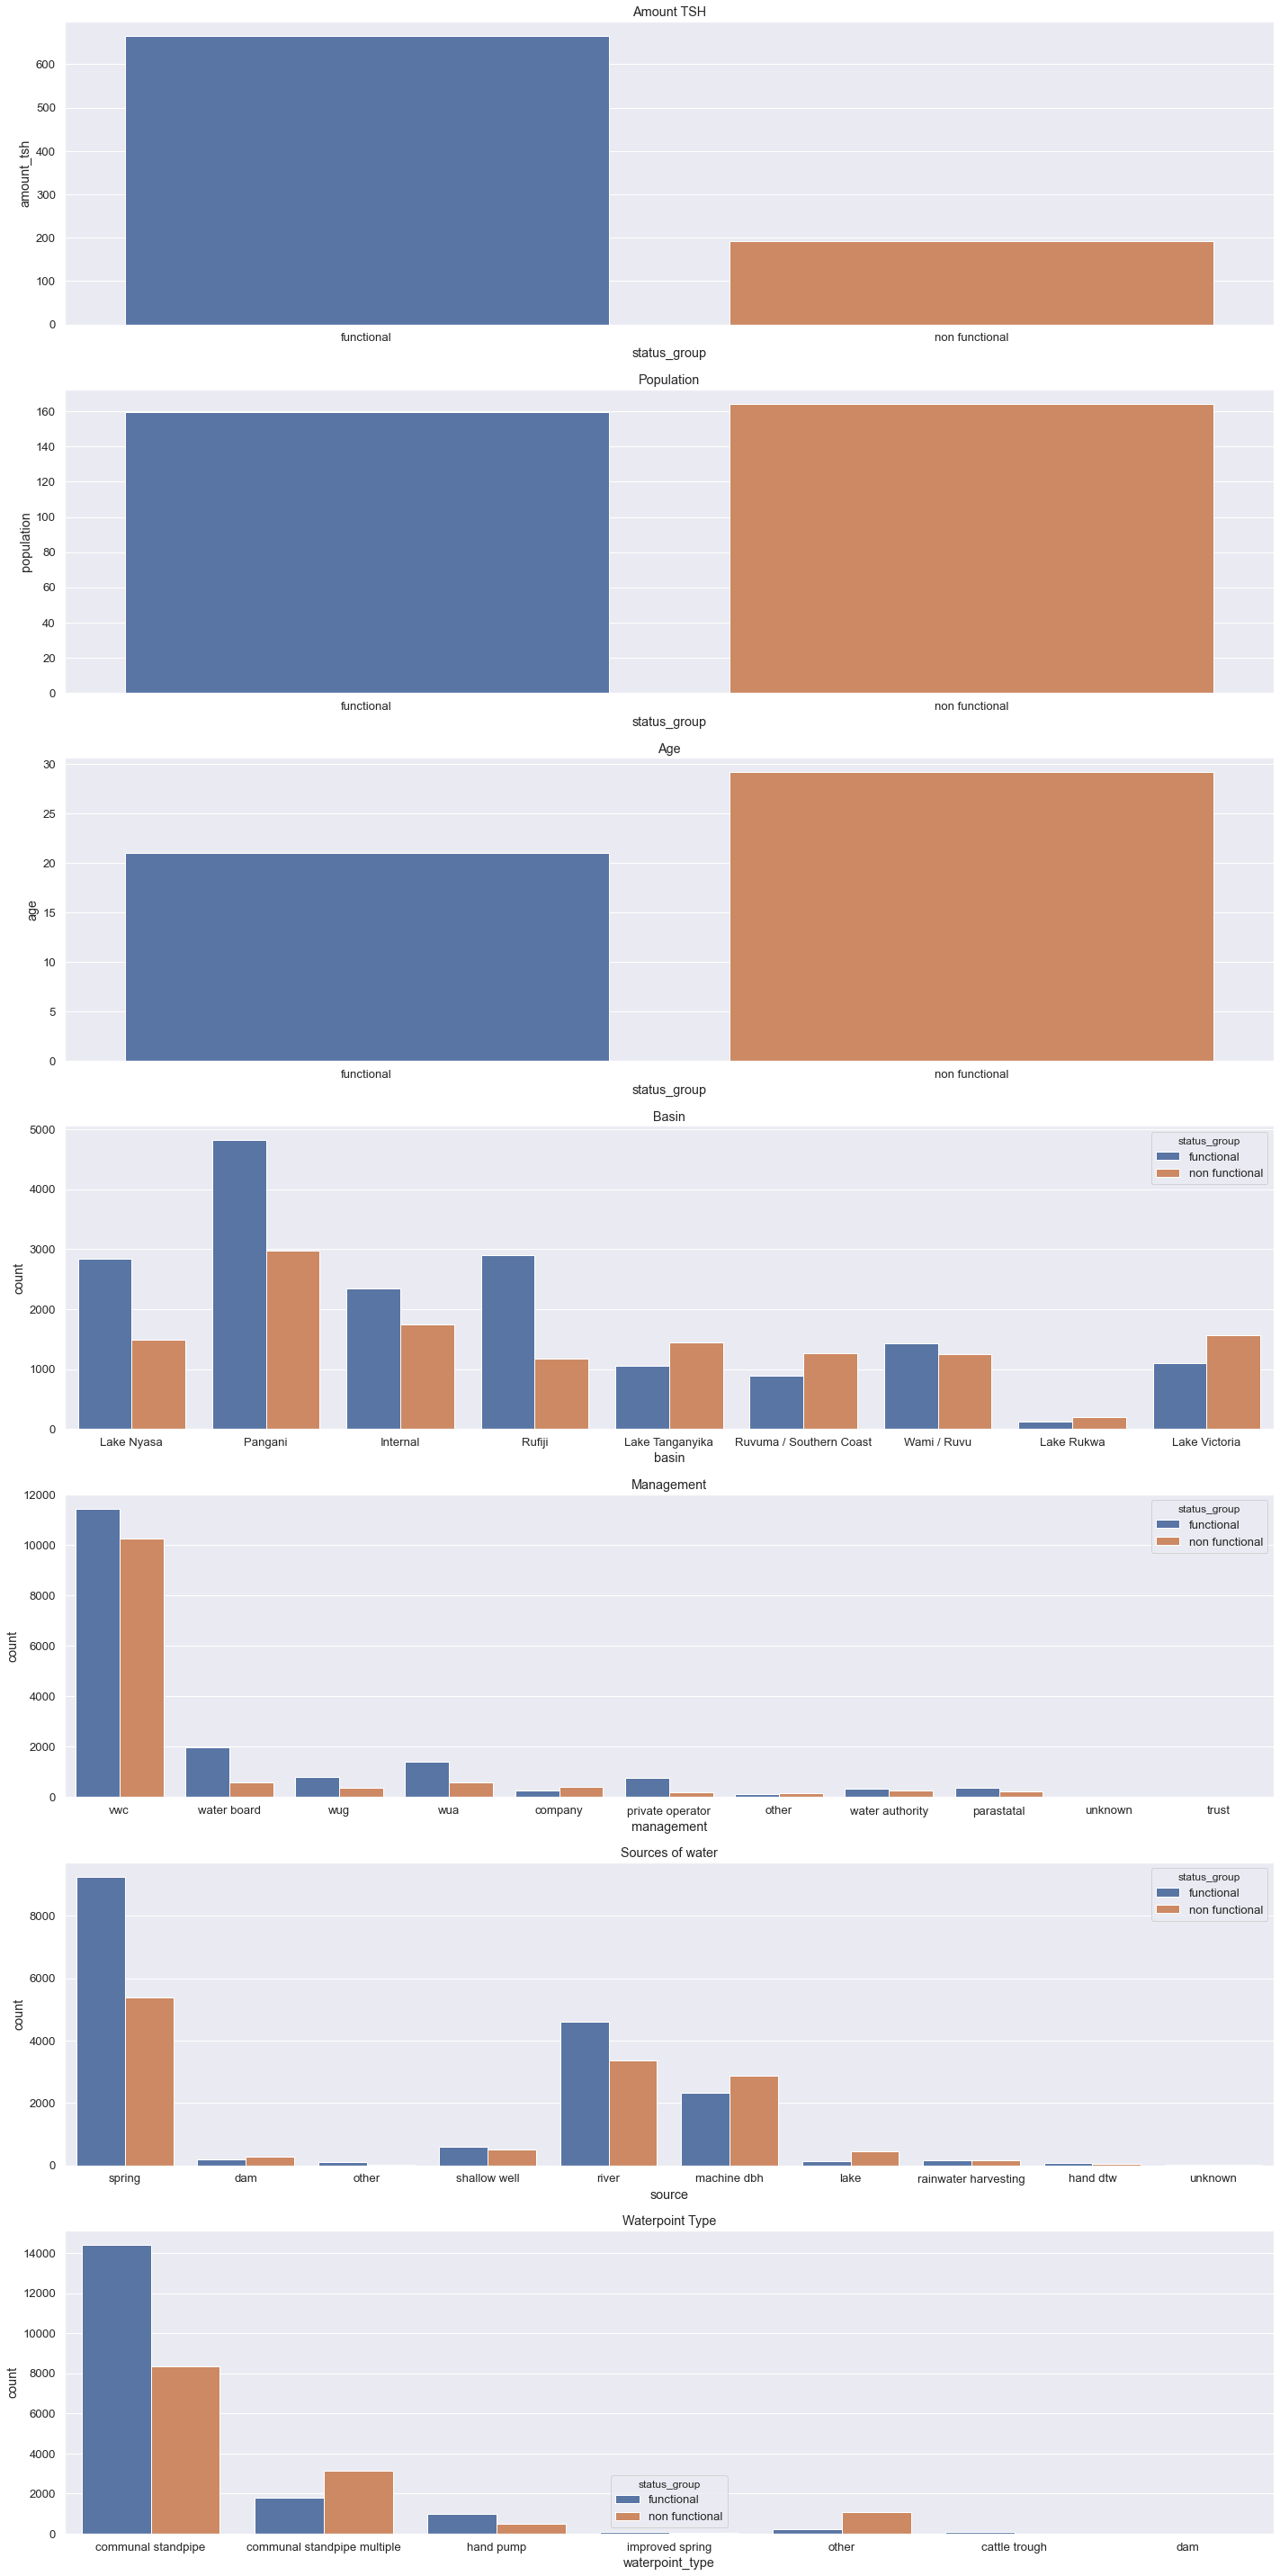

In [19]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("Amount TSH")
sns.barplot(x=df2.status_group, y=df2.amount_tsh, ci=None)

plt.subplot(7,1,2)
plt.title("Population")
sns.barplot(x=df2.status_group, y=df2.population, ci=None)

plt.subplot(7,1,3)
plt.title("Age")
sns.barplot(x=df2.status_group, y=df2.age, ci=None)

plt.subplot(7,1,4)
plt.title("Basin")
sns.countplot(df2.basin, hue=df2.status_group)

plt.subplot(7,1,5)
plt.title("Management")
sns.countplot(df2.management, hue=df2.status_group)

plt.subplot(7,1,6)
plt.title("Sources of water")
sns.countplot(df2.source,hue=df2.status_group)

plt.subplot(7,1,7)
plt.title("Waterpoint Type")
sns.countplot(df2.waterpoint_type,hue=df2.status_group)


plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

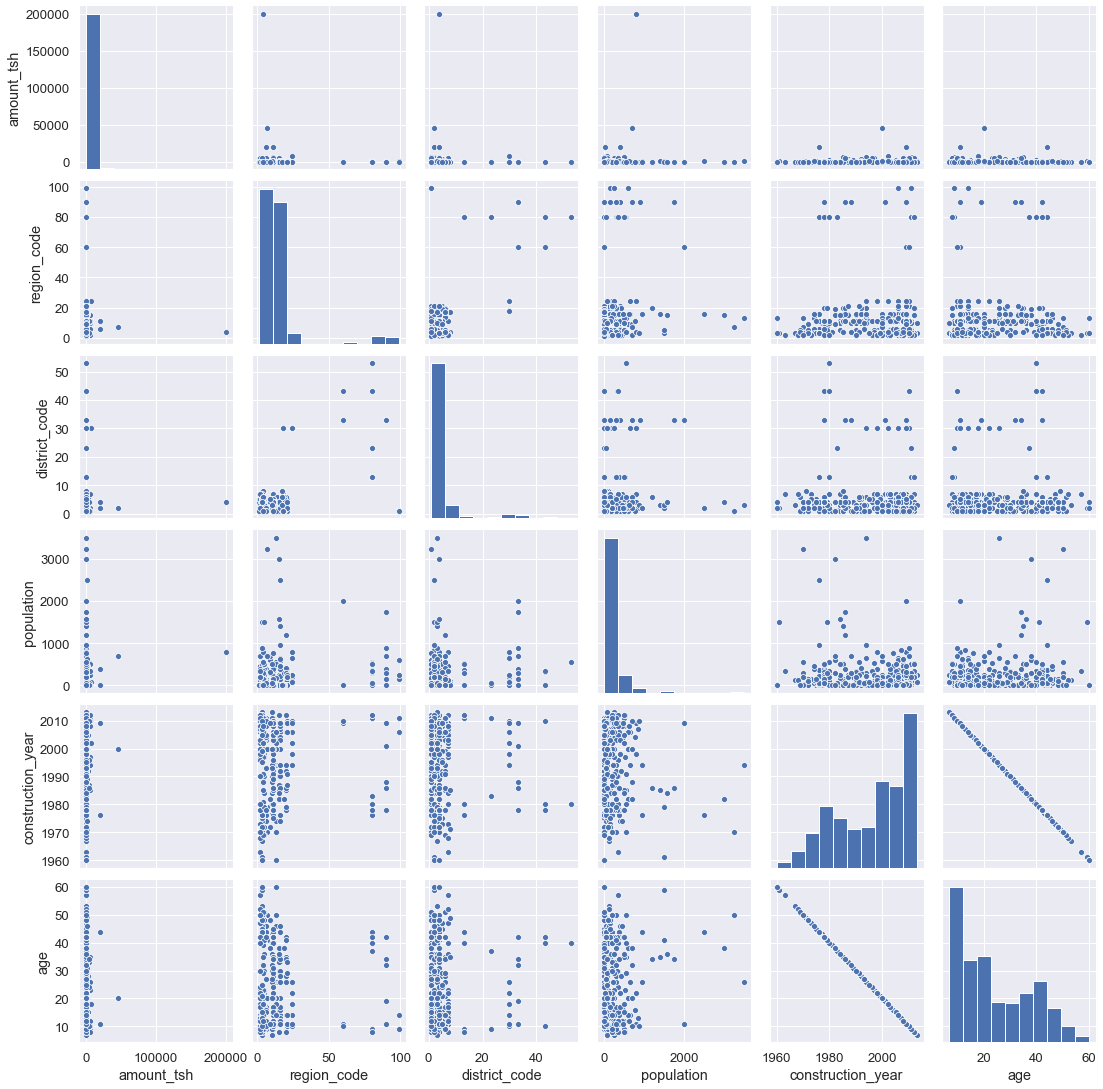

In [20]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df2.sample(500))
plt.show()